In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
class SimpleNeuralNetwork:
    """
    A simple neural network with one hidden layer. We know that we need to define the architecture of our NN, then we need to implement a forwards pass, 
    then we need to have something known as a backward pass or backprop, then finally we can have a training function that relies on forward and backward 
    passes. That's it. 
    
    Architecture: [number of Input(s) which depends on the size of input (feature vector), hidden layer (arbitrary number, hyperparameter), output layer]
    - Input layer: variable size (depends on your input data) 
        if input is 10-dimensional feature vector, we will have 10 input neurons in the input layer. 
    - Hidden layer: configurable number of neurons (hyperparameters)
        Neurons in hidden layer are not dependent on the input layer, they are a hyperparameter. We choose it based on the problem complexity,
        model capacity & overfitting risk. The number of neurons is a design choice here. 
        The bias is not a neuron in the input layer. Biases are added in the next set of layers. Hidden and output. 
    - Output layer: 1 neuron (for binary classification)
        Since it is a binary classification problem, we only have one neuron that will represent the probability of class 1. 
        if P(class = 1) = k, then P(class = 2) = 1 - k
    
    This network uses:
    - Sigmoid activation function. For modelling the probabilities. 
    - Mean squared error loss. As our loss function
    - Basic gradient descent optimization. To find the optimal values of our parameters. 
    """
    # size of layers and learning rate 
    '''
    1st step: Init the arch. 
    '''
    def __init__(self, input_size, hidden_size, learning_rate=0.01): 
        """
        Initialize the neural network.
        
        Args:
            input_size (int): Number of input features
            hidden_size (int): Number of neurons in hidden layer
            learning_rate (float): How fast the network learns
        """
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.learning_rate = learning_rate
        '''
        2nd step: Initialise all weight(s) vector and bias(es). 
        # Initialize weights randomly (small values work better)
        # Weights from input to hidden layer h1
        # size of W1 = (input x hidden) 
        '''

        # connections flowing from input --> h1
        # size of W1 = (neurons in input = 10 , neruons in hidden = 2) 20 parameters so far
        self.W1 = np.random.randn(self.input_size, self.hidden_size) * 0.5
        '''
        # Bias for hidden layer 
        # size of b1 = (1 x number of neurons in hidden layers)
        ''' 
        # number of biases b1 == number of neurons in h1. # 20 + 2 =2 parameters so far
        self.b1 = np.zeros((1, self.hidden_size))
        
        
        
        '''
        # Weights from hidden to output layer
        # size of W2 = (number of neurons in hidden layers x 1)
        '''
        # connections between hidden layer --> output # 22 + 2 = 24 parameters so far
        # size of w2 = (2, 1) 
        self.W2 = np.random.randn(self.hidden_size, 1) * 0.5
        '''
        # Bias for output layer
        # size of b2 = (1x1)
        '''
        # since output has only one neuron, thus 1x1. --> 25 parameters in total, so far.
        self.b2 = np.zeros((1, 1))
    
    def sigmoid(self, x):
        """
        Sigmoid activation function.
        Maps any real number to a value between 0 and 1.
        Formula: 1 / (1 + e^(-x))
        
        # why Clip x ? --> to prevent overflow
        # if x becomes a very large negative number, say -1000, then: np.exp() will give Inf values
        """
        x = np.clip(x, -500, 500)
        return 1 / (1 + np.exp(-x))



    '''
    Why do we need a derivate ever, to find the optimal values of all our parameters. So assume that derivative of a sigmoid 
    is equal to sigmoid(x) * (1 - sigmoid(x))
    '''
    def sigmoid_derivative(self, x):
        """
        Derivative of sigmoid function.
        Used during backpropagation.
        Formula: sigmoid(x) * (1 - sigmoid(x))
        Args: 
            x is not a naked x, it is a sigmoid(x)
        """
        return x * (1 - x)
    
    def forward(self, X):
        """
        Forward pass: compute predictions. Nothing but some stupid matrix multiplication
        
        Args:
            X (numpy array): Input data, shape (n_samples, n_features)
            
        Returns:
            tuple: (hidden_output, final_output)
        """
        '''
        # Step 1: Input to Hidden Layer
        # Multiply inputs by weights and add bias
        # z1 = (X) W1 + b1. Here X is the input from input layer 
        '''
        self.z1 = X@self.W1 + self.b1 # W1,b1
        
        # Apply activation function
        self.a1 = self.sigmoid(self.z1) 
        
        
        '''
        # Step 2: Hidden to Output Layer
        # Multiply hidden outputs by weights and add bias
        # z2 = (X) W2 + b. Here X is the input from the previous layer. 
        '''
        self.z2 =  self.a1@self.W2 + self.b2
        # Apply activation function to get final prediction
        self.a2 = self.sigmoid(self.z2)    
        
        return self.a1, self.a2
    
    def backward(self, X, y, output): # backpropogation's algorithm. 
        """
        Backward pass: compute gradients and update weights. Nothing but some stupid calculus to find optimal values 
        of gradients/parameters. 
        This is where the network learns from its mistakes.

        This algorithm simply helps me compute the value of gradients/parameters/co-efficients/weight & bias vectors.         
        Args:
            X (numpy array): Input data
            y (numpy array): True labels
            output (numpy array): Network predictions
        """
        m = X.shape[0]  # Number of training examples
        
        # Step 1: Calculate output layer error
        # How wrong were our predictions? output_error=true_label − predicted_probability
        output_error = y - output
        # How much should we change the output? (gradient)
        # output_delta = output_error⋅σ'(z)
        output_delta = output_error * self.sigmoid_derivative(output)
        
        # Step 2: Calculate hidden layer error
        # Propagate the error backwards
        hidden_error = output_delta.dot(self.W2.T)
        # How much should we change the hidden layer?
        hidden_delta = hidden_error * self.sigmoid_derivative(self.a1)
        
        # Step 3: Update weights and biases
        # Update weights between hidden and output layer

        '''
        updating all the weight vectors and their biases with the computed derivates using partial derivatives formula. 
        '''
        
        self.W2 += self.a1.T.dot(output_delta) * self.learning_rate / m
        self.b2 += np.sum(output_delta, axis=0, keepdims=True) * self.learning_rate / m
        
        # Update weights between input and hidden layer
        self.W1 += X.T.dot(hidden_delta) * self.learning_rate / m
        self.b1 += np.sum(hidden_delta, axis=0, keepdims=True) * self.learning_rate / m
    
    def train(self, X, y, epochs=1000):
        """
        Train the neural network.
        
        Args:
            X (numpy array): Training data
            y (numpy array): Training labels
            epochs (int): Number of training iterations
            
        Returns:
            list: Loss values during training (for plotting)
        """
        losses = []
        
        for epoch in range(epochs):
            # Forward pass: get predictions
            _, output = self.forward(X)
            
            # Calculate loss (mean squared error)
            loss = np.mean((y - output) ** 2)
            losses.append(loss)
            
            # Backward pass: learn from mistakes
            self.backward(X, y, output)
            
            # Print progress every 100 epochs
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.6f}")
        
        return losses
    
    def predict(self, X):
        """
        Make predictions on new unseen test data.
        
        Args:
            X (numpy array): Input data
            
        Returns:
            numpy array: Predictions (probabilities between 0 and 1)
        """
        _, output = self.forward(X)
        return output

### For a Neural Network with:

* **Input layer**
* **k hidden layers**
* **1 output layer**

You will have:

| Layer type         | Weights            | Biases | Shape of Weights               |
| ------------------ | ------------------ | ------ | ------------------------------ |
| Input → Hidden1    | `W1`, `b1`         |        | `(hidden1_size, input_size)`   |
| Hidden1 → Hidden2  | `W2`, `b2`         |        | `(hidden2_size, hidden1_size)` |
| Hidden2 → Hidden3  | `W3`, `b3`         | ...    | ...                            |
| ...                | ...                | ...    | ...                            |
| Hidden\_k → Output | `W{k+1}`, `b{k+1}` |        | `(output_size, hidden_k_size)` |


### General Rule:

For `i = 1 to k+1`:

* `Wi`: shape = `(layer_size[i], layer_size[i-1])`
* `bi`: shape = `(layer_size[i], 1)`

Where:

* `layer_size[0] = input_size`
* `layer_size[1] = hidden1_size`
* `...`
* `layer_size[k] = hidden_k_size`
* `layer_size[k+1] = output_size`


=== Simple Neural Network Demo ===

Creating XOR dataset...
Input data:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
Expected outputs:
[0 1 1 0]

Creating neural network...
Training neural network...

Epoch 0, Loss: 0.330055
Epoch 100, Loss: 0.319744
Epoch 200, Loss: 0.309865
Epoch 300, Loss: 0.300641
Epoch 400, Loss: 0.292251
Epoch 500, Loss: 0.284808
Epoch 600, Loss: 0.278357
Epoch 700, Loss: 0.272882
Epoch 800, Loss: 0.268321
Epoch 900, Loss: 0.264579
Epoch 1000, Loss: 0.261549
Epoch 1100, Loss: 0.259121
Epoch 1200, Loss: 0.257192
Epoch 1300, Loss: 0.255669
Epoch 1400, Loss: 0.254474
Epoch 1500, Loss: 0.253539
Epoch 1600, Loss: 0.252811
Epoch 1700, Loss: 0.252244
Epoch 1800, Loss: 0.251803
Epoch 1900, Loss: 0.251462
Epoch 2000, Loss: 0.251197
Epoch 2100, Loss: 0.250992
Epoch 2200, Loss: 0.250833
Epoch 2300, Loss: 0.250710
Epoch 2400, Loss: 0.250614
Epoch 2500, Loss: 0.250540
Epoch 2600, Loss: 0.250483
Epoch 2700, Loss: 0.250438
Epoch 2800, Loss: 0.250403
Epoch 2900, Loss: 0.250376
Epoch 3000, Loss:

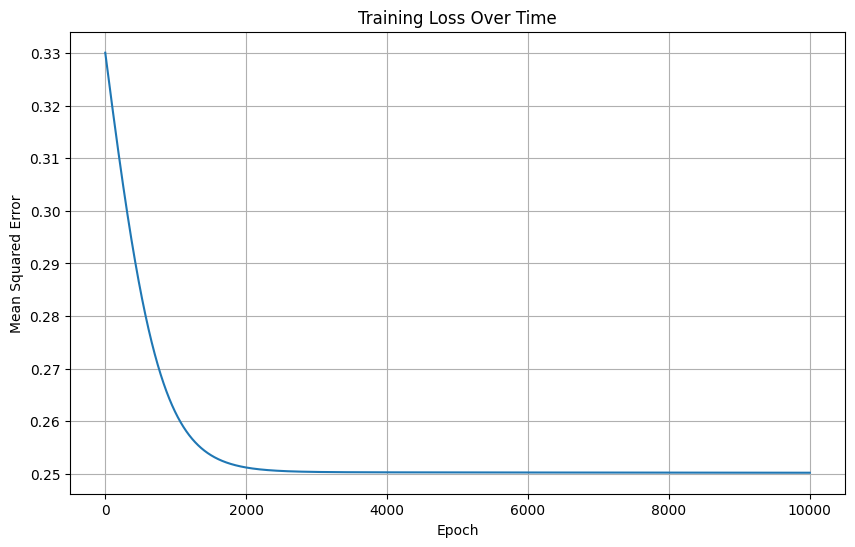


Final loss: 0.250206
Training complete!


In [24]:
# Example usage and demonstration
if __name__ == "__main__":
    print("=== Simple Neural Network Demo ===\n")
    
    # Create some sample data (XOR problem)
    # XOR is a classic problem that's not linearly separable
    print("Creating XOR dataset...")
    X = np.array([[0, 0],    # Input: [0, 0] -> Output: 0
                  [0, 1],    # Input: [0, 1] -> Output: 1
                  [1, 0],    # Input: [1, 0] -> Output: 1
                  [1, 1]])   # Input: [1, 1] -> Output: 0
    
    y = np.array([[0],       # Expected outputs
                  [1],
                  [1],
                  [0]])
    
    print("Input data:")
    print(X)
    print("Expected outputs:")
    print(y.flatten())
    print()
    
    # Create and train the neural network
    print("Creating neural network...")
    # 2 inputs, 4 hidden neurons, learning rate 0.5
    nn = SimpleNeuralNetwork(input_size=2, hidden_size=4, learning_rate=0.01)
    
    print("Training neural network...\n")
    losses = nn.train(X, y, epochs=10000)
    
    # Test the trained network
    print("\n=== Testing the trained network ===")
    predictions = nn.predict(X)
    
    print("Input -> Expected -> Predicted -> Rounded")
    for i in range(len(X)):
        rounded = 1 if predictions[i][0] > 0.5 else 0
        print(f"{X[i]} -> {y[i][0]} -> {predictions[i][0]:.4f} -> {rounded}")
    
    # Plot the training loss
    plt.figure(figsize=(10, 6))
    plt.plot(losses)
    plt.title('Training Loss Over Time')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.grid(True)
    plt.show()
    
    print(f"\nFinal loss: {losses[-1]:.6f}")
    print("Training complete!")

Great — let’s walk through **backpropagation step-by-step for a neural network with**:

* One **input layer**
* One **hidden layer**
* One **output layer**

This will be a full end-to-end walkthrough — math + intuition + code-style explanation.

---

### 📐 Network Structure

Let’s define:

* Input: $X \in \mathbb{R}^{m \times n}$
  $m$: number of samples, $n$: number of input features
* Hidden layer size: $h$
* Output: 1 neuron (binary classification)

#### Parameters:

| Parameter | Shape    | Description                  |
| --------- | -------- | ---------------------------- |
| `W1`      | $(n, h)$ | weights from input → hidden  |
| `b1`      | $(1, h)$ | biases for hidden layer      |
| `W2`      | $(h, 1)$ | weights from hidden → output |
| `b2`      | $(1, 1)$ | bias for output neuron       |

#### Activations:

* Hidden layer: sigmoid
* Output layer: sigmoid

---

### 🔁 Forward Pass:

```python
# Input → Hidden
z1 = X @ W1 + b1        # shape: (m, h)
a1 = sigmoid(z1)        # shape: (m, h)

# Hidden → Output
z2 = a1 @ W2 + b2       # shape: (m, 1)
a2 = sigmoid(z2)        # shape: (m, 1) → predictions
```

---

### 🎯 Loss (Binary Classification):

$$
L = \frac{1}{m} \sum_i (y_i - \hat{y}_i)^2 \quad \text{or use BCE instead}
$$

---

### 🔁 Backward Pass:

We apply the **chain rule** to propagate the error from the output back to weights:

#### 1. Output Layer

$$
\text{output\_error} = a2 - y \quad \text{(shape: (m, 1))}
$$

$$
\text{output\_delta} = \text{output\_error} \cdot \sigma'(z2)
\quad \text{or if a2 already sigmoid: } \text{output\_delta} = (a2 - y) \cdot a2 \cdot (1 - a2)
$$

#### 2. Gradients for W2, b2:

$$
dW2 = a1^T @ \text{output\_delta} \quad \text{(shape: (h, 1))}
$$

$$
db2 = \sum(\text{output\_delta}, \text{axis}=0, \text{keepdims}=True)
$$

#### 3. Backprop to Hidden Layer

$$
\text{hidden\_error} = \text{output\_delta} @ W2^T \quad \text{(shape: (m, h))}
$$

$$
\text{hidden\_delta} = \text{hidden\_error} \cdot a1 \cdot (1 - a1)
$$

#### 4. Gradients for W1, b1:

$$
dW1 = X^T @ \text{hidden\_delta} \quad \text{(shape: (n, h))}
$$

$$
db1 = \sum(\text{hidden\_delta}, \text{axis}=0, \text{keepdims}=True)
$$

---

### 🔁 Update Weights:

```python
W2 -= learning_rate * dW2
b2 -= learning_rate * db2
W1 -= learning_rate * dW1
b1 -= learning_rate * db1
```

---

### 🧠 Intuition:

* Error is measured at the output
* We compute how much each weight *contributed* to that error using gradients
* Then we nudge each weight in the direction that reduces that error

